In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import geopy

In [2]:
df = pd.read_csv("D:/ADSP/Hertfordshire-Constabulary/data/three-years-final.csv")
df

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences
2,d16988855079f14fbc86f00067bf01e1eb9e74089e5476...,2019-03,-0.035386,51.691682,On or near Parking Area,E01023332,Broxbourne 012A,Investigation complete; no suspect identified,Burglary
3,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,Offender given a caution,Drugs
4,c84d04b70fb7d22b8c5d7b4eb280cbd401e87530818a1d...,2019-03,0.137153,51.860920,On or near PLOUGHMANS CLOSE,E01023448,East Hertfordshire 007F,Investigation complete; no suspect identified,Burglary
...,...,...,...,...,...,...,...,...,...
209791,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified,Shoplifting
209792,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified,Other crime
209793,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified,Other crime
209794,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified,Violence and sexual offences


In [3]:
len(df["crime_id"].unique())

209796

In [4]:
def summary_col(df, col):
    
    #print(df[str(col)].unique())
    print(df[str(col)].value_counts())
    sns.set_style("whitegrid")
    plt.figure(figsize=(15,8))
    ax = sns.countplot(y=col, data=df)

Unable to prosecute suspect                            91961
Investigation complete; no suspect identified          88436
Suspect charged                                        17299
Local resolution                                        4761
Offender given a caution                                3211
Action to be taken by another organisation              2094
Formal action is not in the public interest              753
Offender given a drugs possession warning                525
Further investigation is not in the public interest      411
Further action is not in the public interest             152
Offender given penalty notice                            112
Suspect charged as part of another case                   76
Defendant sent to Crown Court                              5
Name: outcome_type, dtype: int64


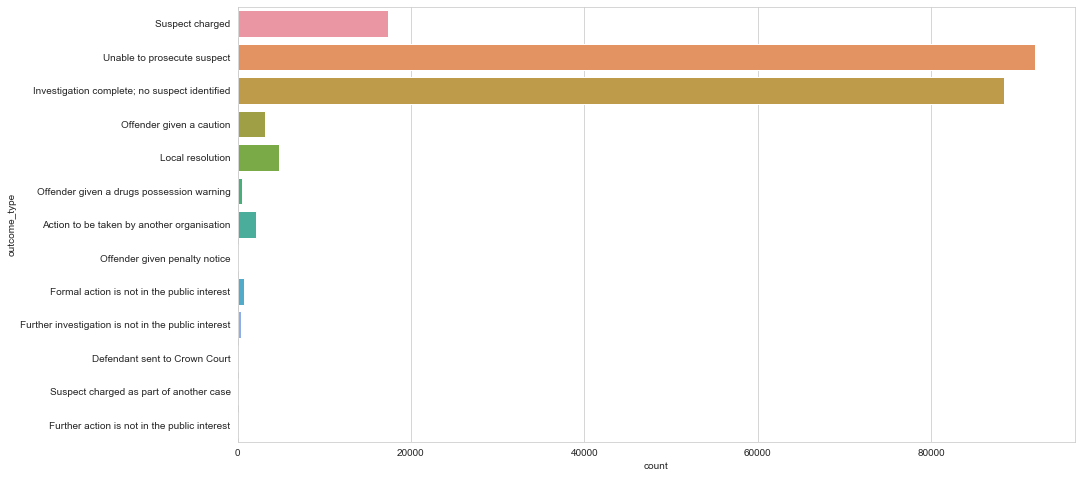

In [5]:
summary_col(df, "outcome_type")

Violence and sexual offences    76351
Criminal damage and arson       21936
Vehicle crime                   21884
Other theft                     21351
Shoplifting                     19848
Public order                    15455
Burglary                        12047
Drugs                            7018
Other crime                      3813
Bicycle theft                    3703
Theft from the person            2832
Robbery                          2006
Possession of weapons            1552
Name: crime_type, dtype: int64


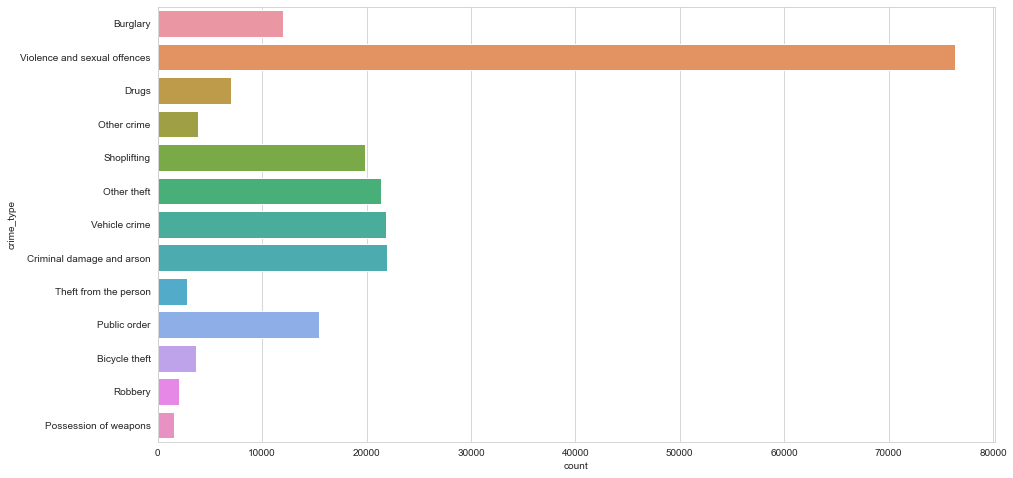

In [6]:
summary_col(df, "crime_type")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209796 entries, 0 to 209795
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   crime_id      209796 non-null  object 
 1   date          209796 non-null  object 
 2   Longitude     209796 non-null  float64
 3   Latitude      209796 non-null  float64
 4   Location      209796 non-null  object 
 5   LSOA_code     209796 non-null  object 
 6   LSOA_name     209796 non-null  object 
 7   outcome_type  209796 non-null  object 
 8   crime_type    209796 non-null  object 
dtypes: float64(2), object(7)
memory usage: 14.4+ MB


### Feature Engineering

which can result in the curse of dimensionality. The concept of the “curse of dimensionality” discusses that in high-dimensional spaces some things just stop working properly.

In [8]:
df["crime_type"] = df["crime_type"].replace({"Other theft":"theft", "Shoplifting":"theft", "Bicycle theft": "theft", "Theft from the person": "theft"}, regex=True)
df.head(2)

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences


In [9]:
df["crime_type"].unique()

array(['Burglary', 'Violence and sexual offences', 'Drugs', 'Other crime',
       'theft', 'Vehicle crime', 'Criminal damage and arson',
       'Public order', 'Robbery', 'Possession of weapons'], dtype=object)

Violence and sexual offences    76351
theft                           47734
Criminal damage and arson       21936
Vehicle crime                   21884
Public order                    15455
Burglary                        12047
Drugs                            7018
Other crime                      3813
Robbery                          2006
Possession of weapons            1552
Name: crime_type, dtype: int64


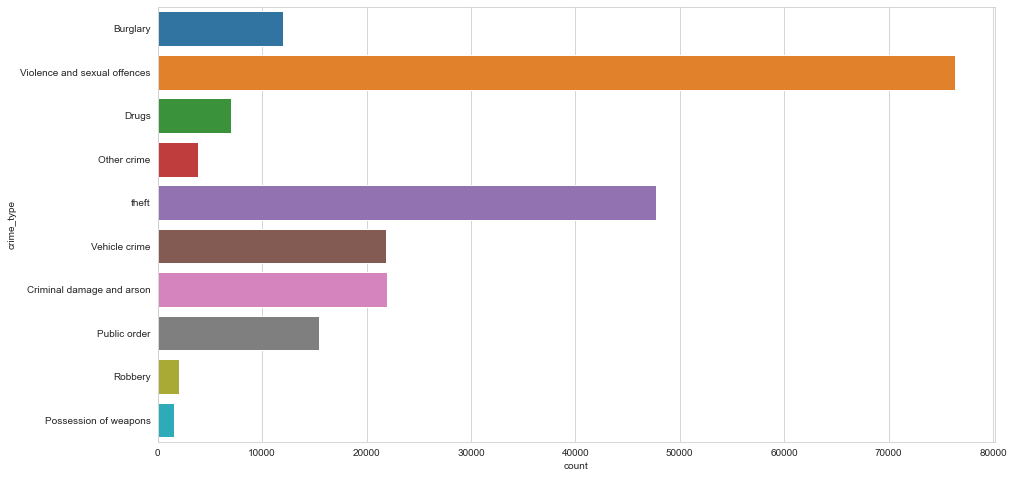

In [10]:
summary_col(df, "crime_type")

In [11]:
df["date"] = pd.to_datetime(df["date"])
df.head(2)

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03-01,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03-01,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences


In [12]:
# Using Dictionary comprehension 
labels = df["crime_type"].astype("category").cat.categories.tolist()
replace_map_comp = {'crime_type' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}

print(replace_map_comp)

{'crime_type': {'Burglary': 0, 'Criminal damage and arson': 1, 'Drugs': 2, 'Other crime': 3, 'Possession of weapons': 4, 'Public order': 5, 'Robbery': 6, 'Vehicle crime': 7, 'Violence and sexual offences': 8, 'theft': 9}}


In [13]:
df = df.replace(replace_map_comp)
df

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03-01,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,0
1,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03-01,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,8
2,d16988855079f14fbc86f00067bf01e1eb9e74089e5476...,2019-03-01,-0.035386,51.691682,On or near Parking Area,E01023332,Broxbourne 012A,Investigation complete; no suspect identified,0
3,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03-01,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,Offender given a caution,2
4,c84d04b70fb7d22b8c5d7b4eb280cbd401e87530818a1d...,2019-03-01,0.137153,51.860920,On or near PLOUGHMANS CLOSE,E01023448,East Hertfordshire 007F,Investigation complete; no suspect identified,0
...,...,...,...,...,...,...,...,...,...
209791,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02-01,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified,9
209792,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02-01,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified,3
209793,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02-01,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified,3
209794,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02-01,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified,8


In [14]:
df.drop(["crime_id"], axis=1, inplace=True)
df

,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,2019-03-01,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,0
1,2019-03-01,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,8
2,2019-03-01,-0.035386,51.691682,On or near Parking Area,E01023332,Broxbourne 012A,Investigation complete; no suspect identified,0
3,2019-03-01,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,Offender given a caution,2
4,2019-03-01,0.137153,51.860920,On or near PLOUGHMANS CLOSE,E01023448,East Hertfordshire 007F,Investigation complete; no suspect identified,0
...,...,...,...,...,...,...,...,...
209791,2022-02-01,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified,9
209792,2022-02-01,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified,3
209793,2022-02-01,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified,3
209794,2022-02-01,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified,8


In [15]:
df["outcome_type"].unique()

array(['Suspect charged', 'Unable to prosecute suspect',
       'Investigation complete; no suspect identified',
       'Offender given a caution', 'Local resolution',
       'Offender given a drugs possession warning',
       'Action to be taken by another organisation',
       'Offender given penalty notice',
       'Formal action is not in the public interest',
       'Further investigation is not in the public interest',
       'Defendant sent to Crown Court',
       'Suspect charged as part of another case',
       'Further action is not in the public interest'], dtype=object)

In [16]:
df["outcome_type"] = df["outcome_type"].replace({"Suspect charged":"prosecuted", "Suspect charged as part of another case":"prosecuted", 
"Defendant sent to Crown Court": "prosecuted", "Action to be taken by another organisation": "prosecuted",
"Offender given a drugs possession warning" : "prosecuted", "Offender given penalty notice":"prosecuted",
"prosecuted as part of another case":"prosecuted",
"Offender given a caution":"prosecuted", "prosecuted as part of another case":"prosecuted"})
df.head(2)

,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,2019-03-01,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,prosecuted,0
1,2019-03-01,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,8


In [17]:
df["outcome_type"].unique()

array(['prosecuted', 'Unable to prosecute suspect',
       'Investigation complete; no suspect identified',
       'Local resolution', 'Formal action is not in the public interest',
       'Further investigation is not in the public interest',
       'Further action is not in the public interest'], dtype=object)

In [18]:
df["outcome_type"] = df["outcome_type"].replace({"Unable to prosecute suspect":"not_prosecuted", "Local resolution":"not_prosecuted", 
"Formal action is not in the public interest": "not_prosecuted", "Further investigation is not in the public interest": "not_prosecuted",
"Further action is not in the public interest" : "not_prosecuted"})
df.head(2)

,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,2019-03-01,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,prosecuted,0
1,2019-03-01,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,not_prosecuted,8


In [19]:
df["outcome_type"].unique()

array(['prosecuted', 'not_prosecuted',
       'Investigation complete; no suspect identified'], dtype=object)

not_prosecuted                                   98038
Investigation complete; no suspect identified    88436
prosecuted                                       23322
Name: outcome_type, dtype: int64


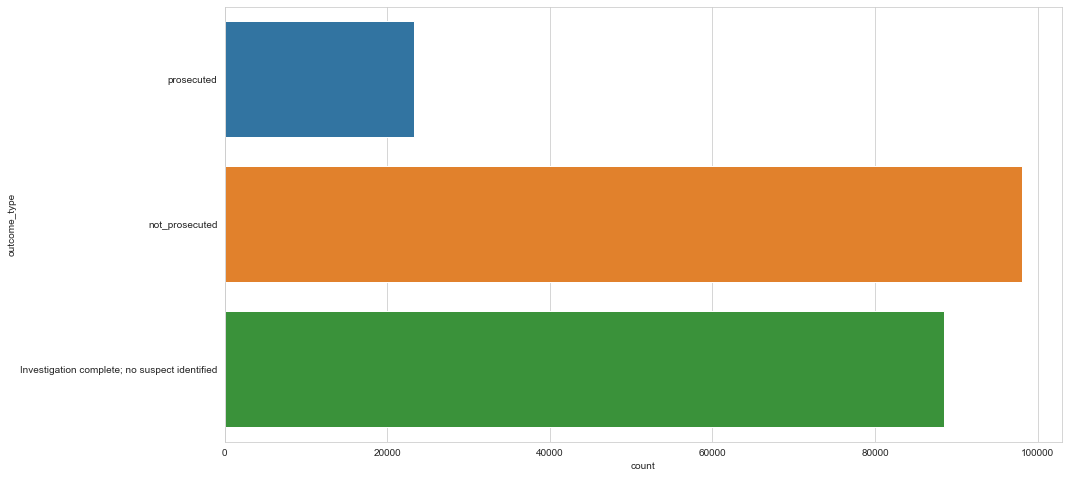

In [20]:
summary_col(df, "outcome_type")

In [21]:
df.drop(df.loc[df['outcome_type']=="Investigation complete; no suspect identified"].index, inplace=True)
df

,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,2019-03-01,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,prosecuted,0
1,2019-03-01,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,not_prosecuted,8
3,2019-03-01,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,prosecuted,2
5,2019-03-01,-0.367482,51.708600,On or near HAMLET CLOSE,E01023733,St Albans 020E,not_prosecuted,2
7,2019-03-01,-0.411727,51.707372,On or near SUMMERHOUSE WAY,E01023804,Three Rivers 001C,not_prosecuted,8
...,...,...,...,...,...,...,...,...
209782,2022-02-01,-0.200649,51.900023,On or near SOUTHGATE,E01023758,Stevenage 008D,not_prosecuted,5
209783,2022-02-01,-0.563047,51.765698,On or near CASTLE HILL AVENUE,E01023364,Dacorum 009D,not_prosecuted,8
209785,2022-02-01,-0.430208,51.758416,On or near Sports/Recreation Area,E01023345,Dacorum 013A,not_prosecuted,9
209788,2022-02-01,-0.407564,51.644965,On or near HODGES WAY,E01023865,Watford 011C,not_prosecuted,8


not_prosecuted    98038
prosecuted        23322
Name: outcome_type, dtype: int64


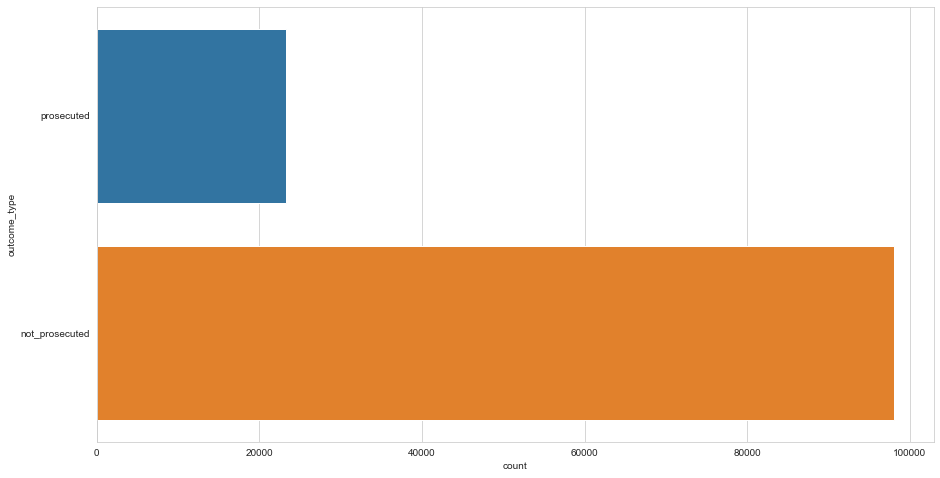

In [22]:
summary_col(df, "outcome_type")

In [23]:
# Using Dictionary comprehension 
labels = df["outcome_type"].astype("category").cat.categories.tolist()
outcome_replace_map = {'outcome_type' : {k: v for k,v in zip(labels, list(range(0, len(labels)+1)))}}

outcome_replace_map

{'outcome_type': {'not_prosecuted': 0, 'prosecuted': 1}}

In [24]:
df = df.replace(outcome_replace_map)
df

,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,2019-03-01,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,1,0
1,2019-03-01,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,0,8
3,2019-03-01,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,1,2
5,2019-03-01,-0.367482,51.708600,On or near HAMLET CLOSE,E01023733,St Albans 020E,0,2
7,2019-03-01,-0.411727,51.707372,On or near SUMMERHOUSE WAY,E01023804,Three Rivers 001C,0,8
...,...,...,...,...,...,...,...,...
209782,2022-02-01,-0.200649,51.900023,On or near SOUTHGATE,E01023758,Stevenage 008D,0,5
209783,2022-02-01,-0.563047,51.765698,On or near CASTLE HILL AVENUE,E01023364,Dacorum 009D,0,8
209785,2022-02-01,-0.430208,51.758416,On or near Sports/Recreation Area,E01023345,Dacorum 013A,0,9
209788,2022-02-01,-0.407564,51.644965,On or near HODGES WAY,E01023865,Watford 011C,0,8


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

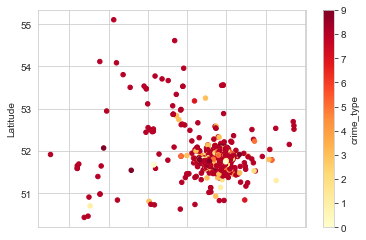

In [25]:
df.plot(x = "Longitude", y = "Latitude", kind = "scatter", c = "crime_type", colormap = "YlOrRd")

In [26]:
def encode_cat(df, col):
    labels = df[col].astype("category").cat.categories.tolist()
    replace_map = {col : {k: v for k,v in zip(labels, list(range(0,len(labels)+1)))}}

    return replace_map

In [27]:
lsoa_dict = encode_cat(df, "LSOA_code")
lsoa_dict

{'LSOA_code': {'E01000015': 0,
  'E01000022': 1,
  'E01000027': 2,
  'E01000040': 3,
  'E01000043': 4,
  'E01000045': 5,
  'E01000092': 6,
  'E01000094': 7,
  'E01000130': 8,
  'E01000145': 9,
  'E01000151': 10,
  'E01000159': 11,
  'E01000164': 12,
  'E01000185': 13,
  'E01000187': 14,
  'E01000194': 15,
  'E01000195': 16,
  'E01000196': 17,
  'E01000216': 18,
  'E01000223': 19,
  'E01000225': 20,
  'E01000226': 21,
  'E01000229': 22,
  'E01000231': 23,
  'E01000233': 24,
  'E01000234': 25,
  'E01000235': 26,
  'E01000243': 27,
  'E01000244': 28,
  'E01000249': 29,
  'E01000252': 30,
  'E01000253': 31,
  'E01000254': 32,
  'E01000263': 33,
  'E01000268': 34,
  'E01000274': 35,
  'E01000285': 36,
  'E01000286': 37,
  'E01000287': 38,
  'E01000288': 39,
  'E01000289': 40,
  'E01000290': 41,
  'E01000292': 42,
  'E01000294': 43,
  'E01000306': 44,
  'E01000310': 45,
  'E01000315': 46,
  'E01000378': 47,
  'E01000478': 48,
  'E01000501': 49,
  'E01000517': 50,
  'E01000536': 51,
  'E01000

In [28]:
df = df.replace(lsoa_dict)
df

,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,2019-03-01,-0.199944,51.900929,On or near EASTGATE,891,Stevenage 008D,1,0
1,2019-03-01,-0.213159,51.765594,On or near PARK MEADOW,1059,Welwyn Hatfield 011C,0,8
3,2019-03-01,-0.249644,51.762762,On or near ALBATROSS WAY,1165,Welwyn Hatfield 010G,1,2
5,2019-03-01,-0.367482,51.708600,On or near HAMLET CLOSE,866,St Albans 020E,0,2
7,2019-03-01,-0.411727,51.707372,On or near SUMMERHOUSE WAY,937,Three Rivers 001C,0,8
...,...,...,...,...,...,...,...,...
209782,2022-02-01,-0.200649,51.900023,On or near SOUTHGATE,891,Stevenage 008D,0,5
209783,2022-02-01,-0.563047,51.765698,On or near CASTLE HILL AVENUE,501,Dacorum 009D,0,8
209785,2022-02-01,-0.430208,51.758416,On or near Sports/Recreation Area,483,Dacorum 013A,0,9
209788,2022-02-01,-0.407564,51.644965,On or near HODGES WAY,998,Watford 011C,0,8


In [29]:
df.drop(["Longitude", "Latitude", "Location", "LSOA_name"], axis = 1, inplace=True)
df

,date,LSOA_code,outcome_type,crime_type
0,2019-03-01,891,1,0
1,2019-03-01,1059,0,8
3,2019-03-01,1165,1,2
5,2019-03-01,866,0,2
7,2019-03-01,937,0,8
...,...,...,...,...
209782,2022-02-01,891,0,5
209783,2022-02-01,501,0,8
209785,2022-02-01,483,0,9
209788,2022-02-01,998,0,8


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121360 entries, 0 to 209789
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          121360 non-null  datetime64[ns]
 1   LSOA_code     121360 non-null  int64         
 2   outcome_type  121360 non-null  int64         
 3   crime_type    121360 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.7 MB


In [31]:
df.date.min(), df.date.max()

(Timestamp('2019-03-01 00:00:00'), Timestamp('2022-02-01 00:00:00'))

In [32]:
def year_month_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month

    return year_month_extract

In [33]:
year_month_extract(df, "date")

<function __main__.year_month_extract(df, col)>

In [34]:
df

,date,LSOA_code,outcome_type,crime_type,date_year,date_month
0,2019-03-01,891,1,0,2019,3
1,2019-03-01,1059,0,8,2019,3
3,2019-03-01,1165,1,2,2019,3
5,2019-03-01,866,0,2,2019,3
7,2019-03-01,937,0,8,2019,3
...,...,...,...,...,...,...
209782,2022-02-01,891,0,5,2022,2
209783,2022-02-01,501,0,8,2022,2
209785,2022-02-01,483,0,9,2022,2
209788,2022-02-01,998,0,8,2022,2


<AxesSubplot:xlabel='date_month', ylabel='count'>

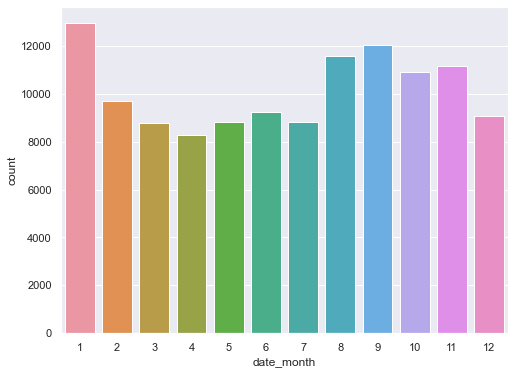

In [35]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.countplot(data = df, x = "date_month")

<AxesSubplot:xlabel='date_year', ylabel='count'>

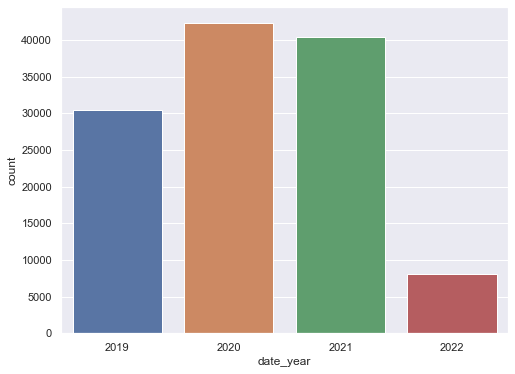

In [36]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.countplot(data = df, x = "date_year")

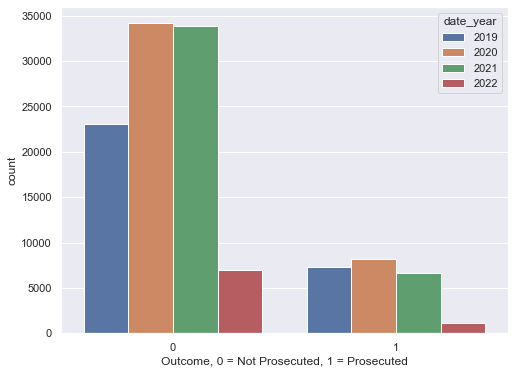

In [37]:
sns.countplot(x = "outcome_type", data=df, hue=df["date_year"])
plt.xlabel("Outcome, 0 = Not Prosecuted, 1 = Prosecuted")
plt.show()

In [38]:
df.drop(["date"], axis=1, inplace=True)
df

,LSOA_code,outcome_type,crime_type,date_year,date_month
0,891,1,0,2019,3
1,1059,0,8,2019,3
3,1165,1,2,2019,3
5,866,0,2,2019,3
7,937,0,8,2019,3
...,...,...,...,...,...
209782,891,0,5,2022,2
209783,501,0,8,2022,2
209785,483,0,9,2022,2
209788,998,0,8,2022,2


In [39]:
dummy_year = pd.get_dummies(df['date_year'])
df = pd.merge(
    left=df,
    right=dummy_year,
    left_index=True,
    right_index=True,
)
print(df)

        LSOA_code  outcome_type  crime_type  date_year  date_month  2019  \
0             891             1           0       2019           3     1   
1            1059             0           8       2019           3     1   
3            1165             1           2       2019           3     1   
5             866             0           2       2019           3     1   
7             937             0           8       2019           3     1   
...           ...           ...         ...        ...         ...   ...   
209782        891             0           5       2022           2     0   
209783        501             0           8       2022           2     0   
209785        483             0           9       2022           2     0   
209788        998             0           8       2022           2     0   
209789       1012             0           8       2022           2     0   

        2020  2021  2022  
0          0     0     0  
1          0     0     0  
3     

In [40]:
df

,LSOA_code,outcome_type,crime_type,date_year,date_month,2019,2020,2021,2022
0,891,1,0,2019,3,1,0,0,0
1,1059,0,8,2019,3,1,0,0,0
3,1165,1,2,2019,3,1,0,0,0
5,866,0,2,2019,3,1,0,0,0
7,937,0,8,2019,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...
209782,891,0,5,2022,2,0,0,0,1
209783,501,0,8,2022,2,0,0,0,1
209785,483,0,9,2022,2,0,0,0,1
209788,998,0,8,2022,2,0,0,0,1


In [41]:
df.drop(["date_year"], axis = 1, inplace=True)
df

,LSOA_code,outcome_type,crime_type,date_month,2019,2020,2021,2022
0,891,1,0,3,1,0,0,0
1,1059,0,8,3,1,0,0,0
3,1165,1,2,3,1,0,0,0
5,866,0,2,3,1,0,0,0
7,937,0,8,3,1,0,0,0
...,...,...,...,...,...,...,...,...
209782,891,0,5,2,0,0,0,1
209783,501,0,8,2,0,0,0,1
209785,483,0,9,2,0,0,0,1
209788,998,0,8,2,0,0,0,1


0    98038
1    23322
Name: outcome_type, dtype: int64

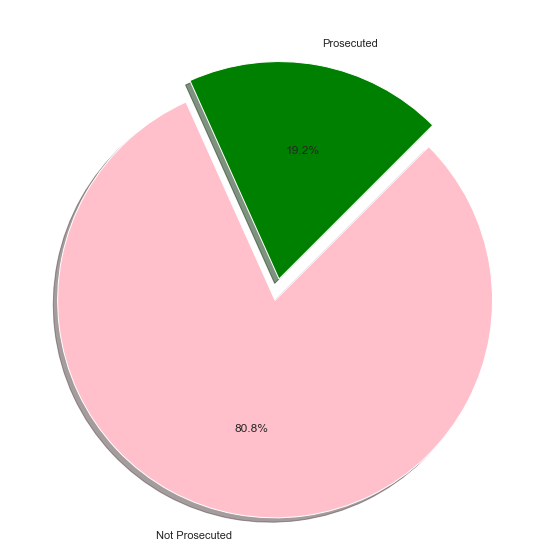

In [42]:
fig = plt.figure(figsize=(10,10))
colors = ["green",'pink']
prosec = df[df['outcome_type']==1]
not_prosec = df[df['outcome_type']==0]
ck = [prosec['outcome_type'].count(), not_prosec['outcome_type'].count()]
piechart = plt.pie(ck,labels=["Prosecuted","Not Prosecuted"],
autopct ='%1.1f%%',
shadow = True,
colors = colors,
startangle = 45,
explode=(0, 0.1))
df.outcome_type.value_counts()

In [46]:
len(df["LSOA_code"].unique())

1186

In [52]:
df.reset_index(inplace=True)
df

,index,LSOA_code,outcome_type,crime_type,date_month,2019,2020,2021,2022
0,0,891,1,0,3,1,0,0,0
1,1,1059,0,8,3,1,0,0,0
2,3,1165,1,2,3,1,0,0,0
3,5,866,0,2,3,1,0,0,0
4,7,937,0,8,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...
121355,209782,891,0,5,2,0,0,0,1
121356,209783,501,0,8,2,0,0,0,1
121357,209785,483,0,9,2,0,0,0,1
121358,209788,998,0,8,2,0,0,0,1


In [53]:
df.drop(["index"], axis = 1, inplace=True)
df.head(2)

,LSOA_code,outcome_type,crime_type,date_month,2019,2020,2021,2022
0,891,1,0,3,1,0,0,0
1,1059,0,8,3,1,0,0,0


In [43]:
df.to_csv(path_or_buf="D:/ADSP/Hertfordshire-Constabulary/data/df-model-with-onehot.csv", index=False)

In [44]:
def get_zipcode(df, geolocator, lat, lon):
    location = geolocator.reverse((df[lat], df[lon]))
    zipcode = location.raw['address']['postcode']
    
    return zipcode


In [45]:
#replace_map = {"crime_type_code": {"Violence and sexual offences": 1, "theft": 2, "Criminal damage and arson": 3, }}